# EDA - Compare Runs with Different Input Parameters
## DSE-260 Group2

### Imports

In [1]:
import bp3d
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 

### Load Data

In [2]:
c = bp3d.Client(url='https://burnpro3d.sdsc.edu/api')
ens = c.load_ensemble('uniform-pgml-success.bp3d.json')
out = ens.output()

replacing ignite.dat with 22016966-2289-4e67-a6fc-91030919d9c6
replacing ignite.dat with f3c7b4e3-d17f-42c9-8696-8c4fd6e3ba4e
replacing ignite.dat with 01e3d210-6074-4b79-9dea-20c935ebac24
replacing ignite.dat with fb624bec-5ed8-477f-b656-c609ed6ee8f3
replacing ignite.dat with a71a6524-b7a0-41d0-9c01-4d23fd2e0122
Save ensemble to replace ignition file contents with new ids.


## Ensemble info

In [3]:
df = ens.df

In [4]:
df

,sim_time,fuel,wind_speed,wind_direction,surface_moisture,output,topo,ignition,run_id,st_state,st_status,st_done
0,600,"{'xlen': 600, 'ylen': 600, 'density': 0.700000...",1.0,230,0.05,"{'steps_fire': 1, 'steps_wind': 1, 'energy_atm...",{'total_startup_iters': 0},"{'perc': 100, 'id': '22016966-2289-4e67-a6fc-9...",80aa1808-adc0-42c1-88e5-abfe3cfc5c41,SUCCESS,Task completed!,0
1,600,"{'xlen': 600, 'ylen': 600, 'density': 0.700000...",1.0,230,0.05,"{'steps_fire': 1, 'steps_wind': 1, 'energy_atm...",{'total_startup_iters': 0},"{'perc': 100, 'id': 'f3c7b4e3-d17f-42c9-8696-8...",d7a29471-89ef-4372-a39f-16f3f306edde,SUCCESS,Task completed!,0
2,600,"{'xlen': 600, 'ylen': 600, 'density': 0.700000...",1.0,230,0.05,"{'steps_fire': 1, 'steps_wind': 1, 'energy_atm...",{'total_startup_iters': 0},"{'perc': 100, 'id': '01e3d210-6074-4b79-9dea-2...",85a4e12f-3016-4531-a062-fe5e6dca07eb,SUCCESS,Task completed!,0
3,600,"{'xlen': 600, 'ylen': 600, 'density': 0.700000...",1.0,230,0.05,"{'steps_fire': 1, 'steps_wind': 1, 'energy_atm...",{'total_startup_iters': 0},"{'perc': 100, 'id': 'fb624bec-5ed8-477f-b656-c...",dd17e766-419e-439f-91e4-876a48d600bf,SUCCESS,Task completed!,0
4,600,"{'xlen': 600, 'ylen': 600, 'density': 0.700000...",1.0,230,0.05,"{'steps_fire': 1, 'steps_wind': 1, 'energy_atm...",{'total_startup_iters': 0},"{'perc': 100, 'id': 'a71a6524-b7a0-41d0-9c01-4...",8f2da49a-9f67-4cce-b207-875c207b0ce9,SUCCESS,Task completed!,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,600,"{'xlen': 600, 'ylen': 600, 'density': 0.700000...",15.0,330,0.15,"{'steps_fire': 1, 'steps_wind': 1, 'energy_atm...",{'total_startup_iters': 0},"{'perc': 100, 'id': '22016966-2289-4e67-a6fc-9...",56b35589-2b95-402d-9786-e962bd6e4780,SUCCESS,Task completed!,0
1151,600,"{'xlen': 600, 'ylen': 600, 'density': 0.700000...",15.0,330,0.15,"{'steps_fire': 1, 'steps_wind': 1, 'energy_atm...",{'total_startup_iters': 0},"{'perc': 100, 'id': 'f3c7b4e3-d17f-42c9-8696-8...",35075bfa-a1ed-4faa-bfd6-fc92c6e4954d,SUCCESS,Task completed!,0
1152,600,"{'xlen': 600, 'ylen': 600, 'density': 0.700000...",15.0,330,0.15,"{'steps_fire': 1, 'steps_wind': 1, 'energy_atm...",{'total_startup_iters': 0},"{'perc': 100, 'id': '01e3d210-6074-4b79-9dea-2...",8ba41ffa-3e6a-4ff7-a1c4-2b9c97a97d77,SUCCESS,Task completed!,0
1153,600,"{'xlen': 600, 'ylen': 600, 'density': 0.700000...",15.0,330,0.15,"{'steps_fire': 1, 'steps_wind': 1, 'energy_atm...",{'total_startup_iters': 0},"{'perc': 100, 'id': 'fb624bec-5ed8-477f-b656-c...",c1e8ee75-c0d8-4d0f-bd79-8282d3b7960a,SUCCESS,Task completed!,0


## Compare Simulation Runs

In [6]:
#Input parameters
import json
import pandas as pd

with open('uniform-pgml-success.bp3d.json') as f:
    s = f.read()
ens_json = json.loads(s)
ens_json.keys()
ens_df_json = json.loads(ens_json['df'])
ens_df1 = pd.DataFrame().from_dict(ens_df_json)

wind_s = ens_df1["wind_speed"]
wind_d = ens_df1["wind_direction"]
surface_m = ens_df1["surface_moisture"]
ignition_t = ens_df1["ignition"]

##### Input parameters vs fuel moisture

Input Parameters:
Wind Speed: 1.0 Wind Direction: 230 Surface Moisture: 0.05 Ignition: ['       igntype=    4\n', '    &aeriallist\n', '       naerial=  84\n'] 



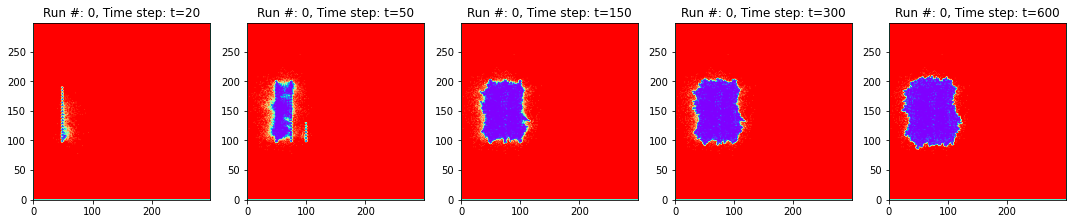

Input Parameters:
Wind Speed: 1.0 Wind Direction: 260 Surface Moisture: 0.1 Ignition: ['       igntype=    4\n', '    &aeriallist\n', '       naerial=  84\n'] 



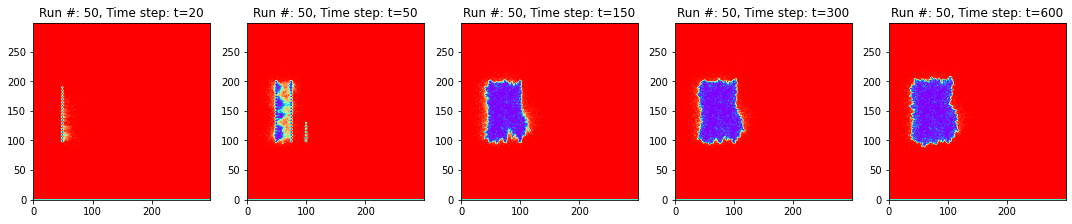

Input Parameters:
Wind Speed: 2.0 Wind Direction: 280 Surface Moisture: 0.15 Ignition: ['       igntype=    4\n', '    &aeriallist\n', '       naerial=  84\n'] 



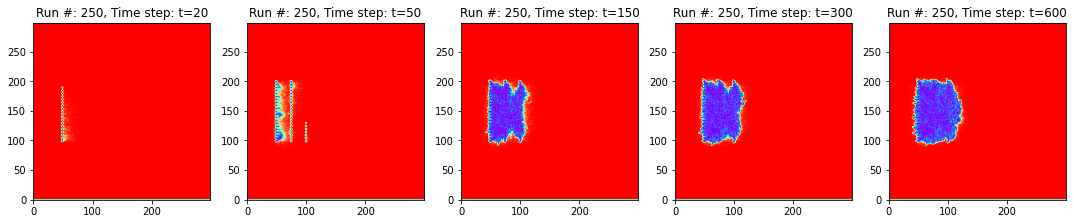

Input Parameters:
Wind Speed: 2.0 Wind Direction: 320 Surface Moisture: 0.05 Ignition: ['       igntype=    4\n', '    &aeriallist\n', '       naerial=  84\n'] 



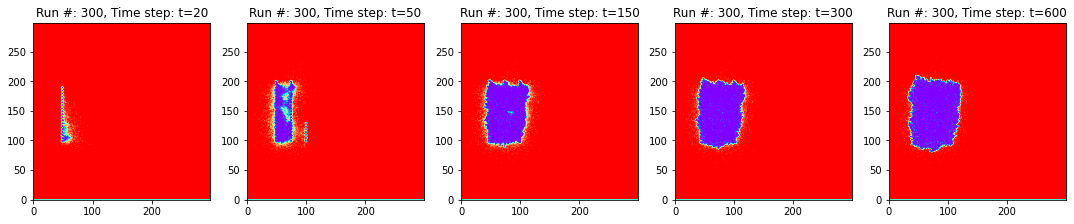

Input Parameters:
Wind Speed: 3.0 Wind Direction: 310 Surface Moisture: 0.05 Ignition: ['       igntype=    4\n', '    &aeriallist\n', '       naerial=  84\n'] 



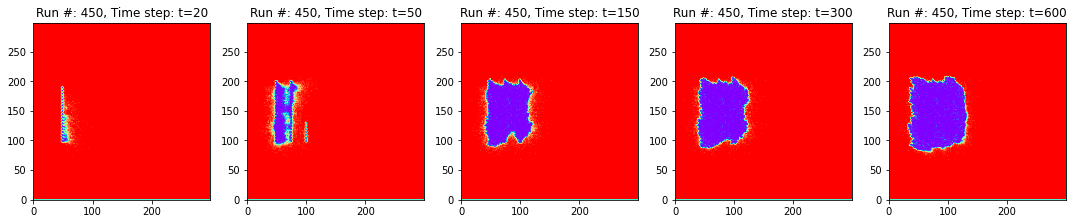

Input Parameters:
Wind Speed: 5.0 Wind Direction: 300 Surface Moisture: 0.05 Ignition: ['       igntype=    4\n', '    &aeriallist\n', '       naerial=  84\n'] 



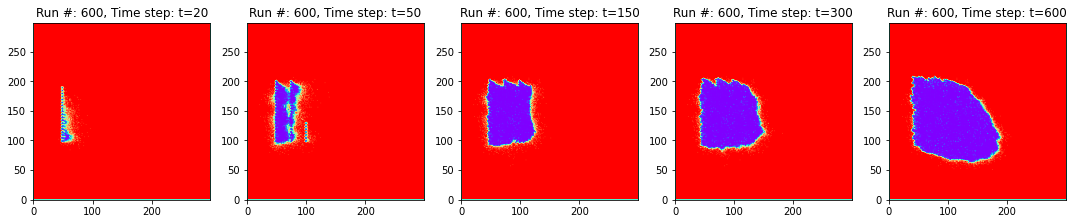

Input Parameters:
Wind Speed: 7.5 Wind Direction: 290 Surface Moisture: 0.05 Ignition: ['       igntype=    4\n', '    &aeriallist\n', '       naerial=  84\n'] 



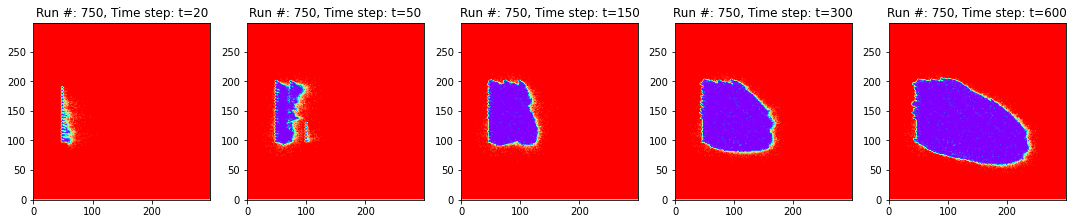

Input Parameters:
Wind Speed: 15.0 Wind Direction: 330 Surface Moisture: 0.15 Ignition: ['       igntype=    5\n', '       &atvlist\n', '          natv=    2\n'] 



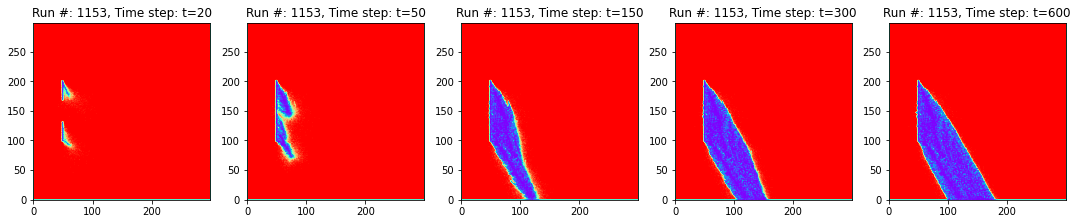

In [43]:
%matplotlib inline
run_samples = [0,50,250,300,450,600,750,1153]
for run in run_samples:
    run_zarr = out[run].zarr
    fuels_dens = np.array(run_zarr['fuels-moist'])
    fig, axs = plt.subplots(1, 5,figsize=(15,15))
    times=[20,50,150,300,600]
    print("Input Parameters:\nWind Speed:",wind_s[run],"Wind Direction:",wind_d[run],"Surface Moisture:",surface_m[run],"Ignition:",ignition_t[run].get('dat')[:3],"\n") 

    for i, ax in enumerate(axs.flatten()):
        ax.set_title(f"Run #: {run}, Time step: t={times[i]}")
#         ax.set_suptitle('s')
        ax.imshow(fuels_dens[times[i],0,:,:],cmap='rainbow',origin="lower")
    fig.tight_layout()
    plt.show()

##### Input parameters vs fuel density

Input Parameters:
Wind Speed: 1.0 Wind Direction: 230 Surface Moisture: 0.05 Ignition: ['       igntype=    4\n', '    &aeriallist\n', '       naerial=  84\n'] 



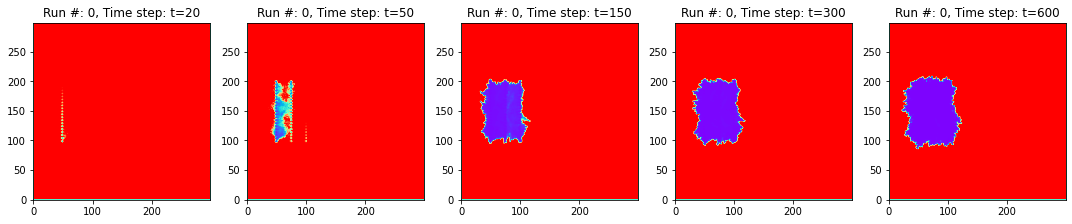

Input Parameters:
Wind Speed: 1.0 Wind Direction: 260 Surface Moisture: 0.1 Ignition: ['       igntype=    4\n', '    &aeriallist\n', '       naerial=  84\n'] 



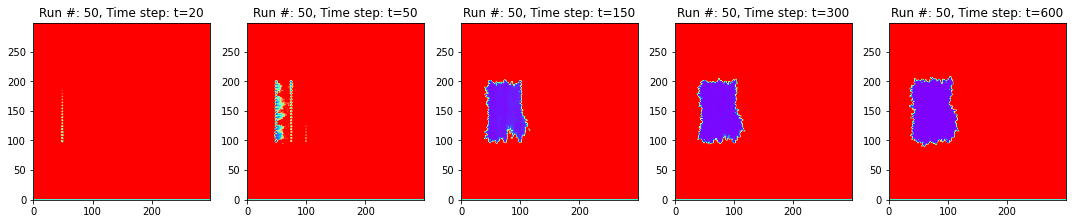

Input Parameters:
Wind Speed: 2.0 Wind Direction: 280 Surface Moisture: 0.15 Ignition: ['       igntype=    4\n', '    &aeriallist\n', '       naerial=  84\n'] 



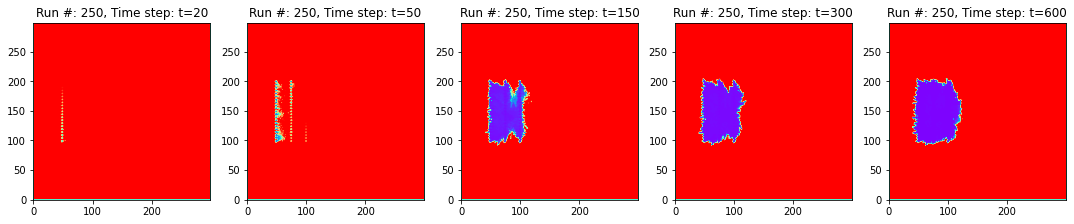

Input Parameters:
Wind Speed: 2.0 Wind Direction: 320 Surface Moisture: 0.05 Ignition: ['       igntype=    4\n', '    &aeriallist\n', '       naerial=  84\n'] 



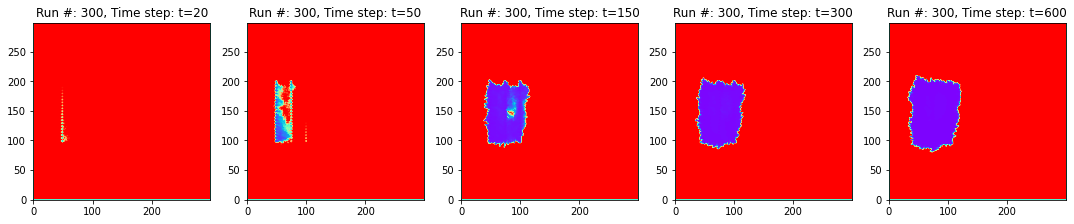

Input Parameters:
Wind Speed: 3.0 Wind Direction: 310 Surface Moisture: 0.05 Ignition: ['       igntype=    4\n', '    &aeriallist\n', '       naerial=  84\n'] 



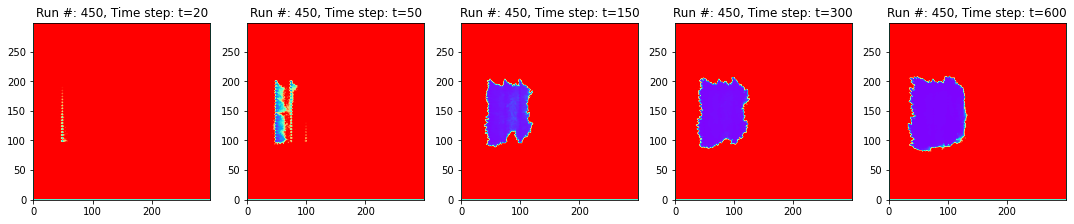

Input Parameters:
Wind Speed: 5.0 Wind Direction: 300 Surface Moisture: 0.05 Ignition: ['       igntype=    4\n', '    &aeriallist\n', '       naerial=  84\n'] 



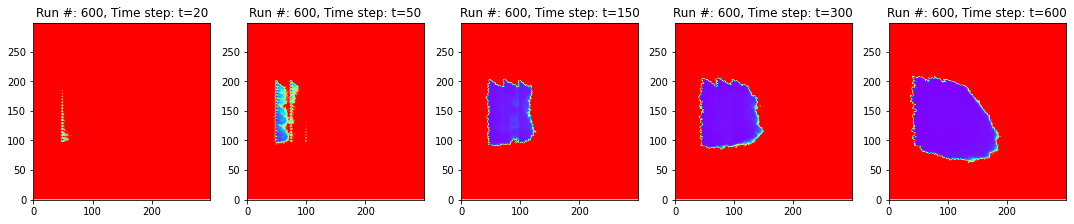

Input Parameters:
Wind Speed: 7.5 Wind Direction: 290 Surface Moisture: 0.05 Ignition: ['       igntype=    4\n', '    &aeriallist\n', '       naerial=  84\n'] 



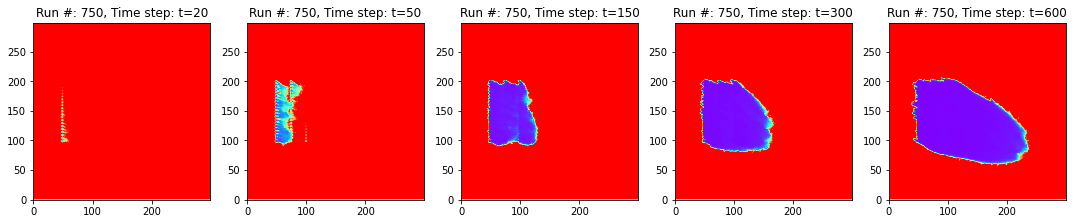

Input Parameters:
Wind Speed: 15.0 Wind Direction: 330 Surface Moisture: 0.15 Ignition: ['       igntype=    5\n', '       &atvlist\n', '          natv=    2\n'] 



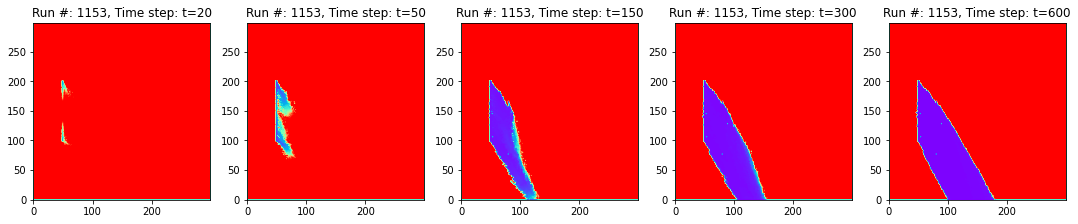

In [44]:
run_samples = [0,50,250,300,450,600,750,1153]
for run in run_samples:
    run_zarr = out[run].zarr
    fuels_dens = np.array(run_zarr['fuels-dens'])
    fig, axs = plt.subplots(1, 5,figsize=(15,15))
    times=[20,50,150,300,600]
    print("Input Parameters:\nWind Speed:",wind_s[run],"Wind Direction:",wind_d[run],"Surface Moisture:",surface_m[run],"Ignition:",ignition_t[run].get('dat')[:3],"\n") 

    for i, ax in enumerate(axs.flatten()):
        ax.set_title(f"Run #: {run}, Time step: t={times[i]}")
#         ax.set_suptitle('s')
        ax.imshow(fuels_dens[times[i],0,:,:],cmap='rainbow',origin="lower")
    fig.tight_layout()
    plt.show()